In [1]:
import pandas as pd
import pymongo
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
collection="LoandefaultData"
database="JAGA"

In [3]:
from dotenv import load_dotenv
load_dotenv()

MONGO_DB_URL = os.getenv("MONGO_DB_URL")

In [4]:
mongoclient=pymongo.MongoClient(MONGO_DB_URL)
collection=mongoclient[database][collection]
df=pd.DataFrame(list(collection.find()))

In [5]:
df=df[:10000]

In [6]:
df

,_id,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,6860df953b4ba14f44350261,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,6860df953b4ba14f44350262,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,6860df953b4ba14f44350263,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,6860df953b4ba14f44350264,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,6860df953b4ba14f44350265,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6860df953b4ba14f4435296c,HFTF81AJH4,55,75207,100323,673,79,4,14.02,36,0.53,High School,Full-time,Single,Yes,Yes,Auto,No,0
9996,6860df953b4ba14f4435296d,1P45JZCUVU,51,134802,103457,545,113,1,10.71,48,0.34,High School,Full-time,Divorced,No,Yes,Other,No,0
9997,6860df953b4ba14f4435296e,LSG13QNLEN,57,113239,192756,331,67,3,16.37,12,0.46,PhD,Unemployed,Divorced,Yes,No,Education,Yes,0
9998,6860df953b4ba14f4435296f,OM3FEBAEZE,64,22272,49269,486,97,1,15.53,36,0.34,Master's,Full-time,Married,Yes,Yes,Business,Yes,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   _id             255347 non-null  object 
 1   LoanID          255347 non-null  object 
 2   Age             255347 non-null  int64  
 3   Income          255347 non-null  int64  
 4   LoanAmount      255347 non-null  int64  
 5   CreditScore     255347 non-null  int64  
 6   MonthsEmployed  255347 non-null  int64  
 7   NumCreditLines  255347 non-null  int64  
 8   InterestRate    255347 non-null  float64
 9   LoanTerm        255347 non-null  int64  
 10  DTIRatio        255347 non-null  float64
 11  Education       255347 non-null  object 
 12  EmploymentType  255347 non-null  object 
 13  MaritalStatus   255347 non-null  object 
 14  HasMortgage     255347 non-null  object 
 15  HasDependents   255347 non-null  object 
 16  LoanPurpose     255347 non-null  object 
 17  HasCoSigne

In [5]:
df.drop(["_id","LoanID"],axis=1,inplace=True)

In [12]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
num_feature=[feature for feature in df.columns if df[feature].dtype != "O"]
cat_feat=[feature for feature in df.columns if df[feature].dtype =="O"]

print(f"we have {len(num_feature)} numerical feature : {num_feature}")
print(f"we have {len(cat_feat)} categorical feature : {cat_feat}")

we have 10 numerical feature : ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']
we have 7 categorical feature : ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


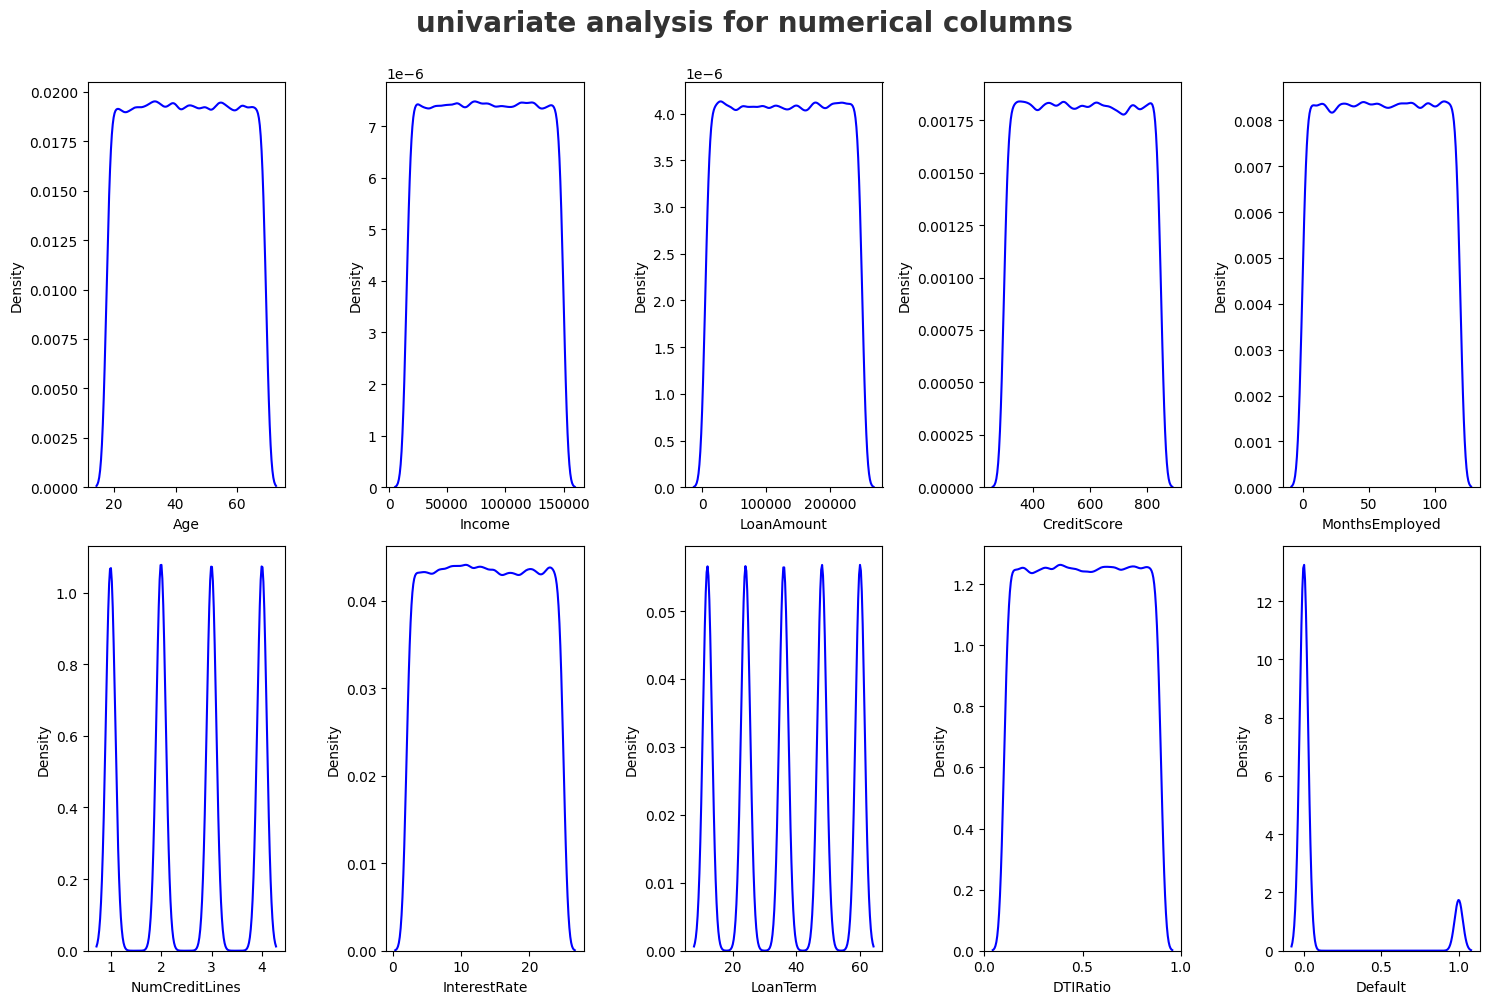

In [32]:
plt.figure(figsize=(15,10))
plt.suptitle("univariate analysis for numerical columns",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(num_feature)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(x=df[num_feature[i]],color='blue')
    plt.xlabel(num_feature[i])
    plt.tight_layout()


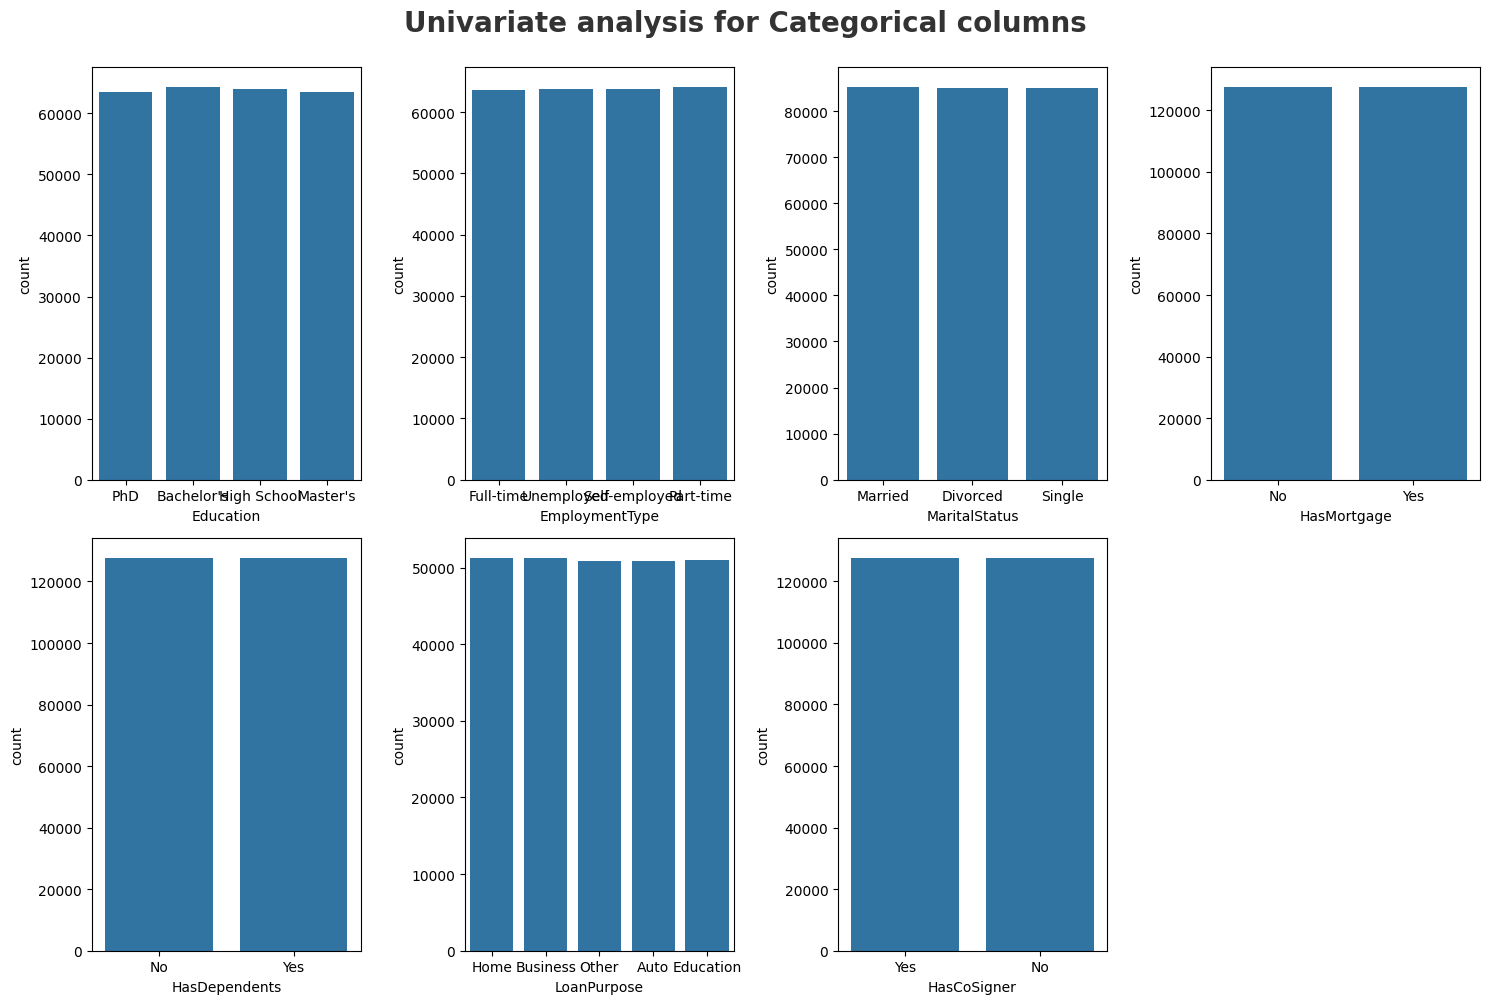

: 

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate analysis for Categorical columns",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(cat_feat)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[cat_feat[i]])
    plt.xlabel(cat_feat[i])
    plt.tight_layout()


In [8]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in cat_feat:
    if chi2_contingency(pd.crosstab(df['Default'],df[feature]))[1]<0.05:
        chi2_test.append("Reject Null hypothesis")
    else:
        chi2_test.append("Fail to reject the null hypothesis")
result=pd.DataFrame(data=[cat_feat,chi2_test]).T
result.columns=['Features','Hypothesis test result']
result

,Features,Hypothesis test result
0,Education,Reject Null hypothesis
1,EmploymentType,Reject Null hypothesis
2,MaritalStatus,Reject Null hypothesis
3,HasMortgage,Reject Null hypothesis
4,HasDependents,Reject Null hypothesis
5,LoanPurpose,Reject Null hypothesis
6,HasCoSigner,Reject Null hypothesis


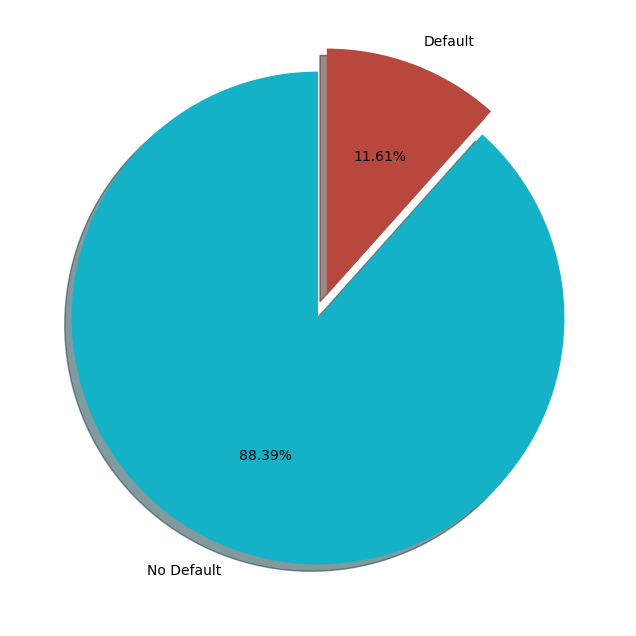

In [14]:
percentage = df['Default'].value_counts(normalize=True) * 100
label = ["No Default", "Default"]

fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
colurs = ["#15b2c7", "#b8483e"]
ax.pie(percentage, labels=label, startangle=90,
       autopct="%1.2f%%", explode=explode, shadow=True, colors=colurs)
plt.show()

In [8]:
df[num_feature].skew(axis=0,skipna=True)

Age               0.000698
Income           -0.000381
LoanAmount       -0.001827
CreditScore       0.004688
MonthsEmployed   -0.002142
NumCreditLines   -0.000278
InterestRate      0.004608
LoanTerm         -0.002178
DTIRatio         -0.001499
Default           2.396377
dtype: float64

In [88]:
X=df.drop('Default',axis=1)
y=df.Default

In [89]:
X.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [90]:
label_encod=['HasMortgage','HasDependents','LoanPurpose','HasCoSigner']

In [91]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [92]:
labl_encod=LabelEncoder()
for col in label_encod:
    X[f"encd_" + col]=labl_encod.fit_transform(X[col])
    X=X.drop(columns=[col])



In [93]:
or_encod=['Education','EmploymentType']
oh_encod=['MaritalStatus']
trans_colum=[feature for feature in X.columns if X[feature].dtype!="O"]

In [94]:
one_encod=OneHotEncoder()
ord_enc=OrdinalEncoder()
tran_column=StandardScaler()


preprocesser=ColumnTransformer(
    [
        ('Onehotencoder',one_encod,oh_encod),
        ('OrdinalEncoder',ord_enc,or_encod),
        ('StandardScaler',tran_column,trans_colum),
    ]
)

In [95]:
X=preprocesser.fit_transform(X)

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [103]:
x_test.shape

(51070, 18)